# Muhammad Panca Anandri 09011281722069
# Implementasi Neural Network dalam menentukan penderita Obesitas. 

Kegemukan atau obesitas adalah suatu kondisi medis berupa kelebihan lemak tubuh yang terakumulasi sedemikian rupa sehingga menimbulkan dampak merugikan bagi kesehatan, yang kemudian menurunkan harapan hidup dan/atau meningkatkan masalah kesehatan. Seseorang dianggap menderita kegemukan (obese) bila indeks massa tubuh (IMT), yaitu ukuran yang diperoleh dari hasil pembagian berat badan dalam kilogram dengan kuadrat tinggi badan dalam meter, lebih dari 30 kg/m2

# Dataset ini memiliki 3 anggota dengan 1 parameter Output
1. Gender (Jenis Kelamin ; 1 = Laki-laki dan 0 = Perempuan.)
2. Height (Tinggi Badan)
3. Weight (Berat Badan)
4. Index (0 = Obesitas, 1 = Normal)

# 1. Import Library
Langkah pertama yang kita lakukan adalah mengimport library yang akan kita gunakan.
### Library Numpy 
berfungsi untuk mengolah data dalam bentuk angka (array)
### Library Matplotlib 
berfungsi untuk membantu visualisasi dataset sehingga memudahkan untuk dipahami
### Library Sklearn 
digunakan pada tahap Preprosesing untuk mengubah data menjadi format yang lebih efektif diproses dalam jaringan saraf
### Library Pandas
Berfungsi untuk membaca file dataset dalam bentuk .CSV
### Library Seaborn
sama seperti Matplotlib,yakni berfungsi untuk membantu visualisasi dataset

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


# 2. Import Dataset
Dataset ini memiliki 4 kolom dan 500 baris dengan 3 kolom sebagai features dan 1 kolom (target) sebagai label yang memiliki nilai 0 (Normal) dan 1 (Obesitas) 

In [31]:
dataset=pd.read_csv('obesitas.csv',';')
dataset.head()

,Gender,Height,Weight,Index
0,1,174,96,1
1,1,189,87,0
2,0,185,110,1
3,0,195,104,1
4,1,149,61,1


 # 3. Mengecek apakah ada data kosong
Setelah kita menimport dataset ada baiknya kita terlebih dahulu melakukan pegecekaan terhadap dataset kita, apakah data tersebih sudah bersih atau masih ada data kosong.

In [32]:
dataset.isnull().any().sum()

0

# 4. Visualisasi data
Untuk mengetahui berapa banyak persebaran data terhadap nilai 0 dan 1 maka kita perlu visualisasi agar lebih muda dipahami. Dengan bantuan library matplotlib dan seaborn.

In [33]:
dataset.Index.value_counts()

1    396
0    104
Name: Index, dtype: int64

- Perintah diatas berfungsi untuk melihat jumlah data yang berlabel 1 (Obesitas) yakni sebanyak 396 sedangkan data yang berlabel 0 (Normal) sebanyak 104.
- Sedangkan pada perintah dibawah ini berfugsi untuk menampilkan jumlah data yang dihasilkan pada perintah diatas dalam bentuk Bar menggunakan bantuan library seaborn 

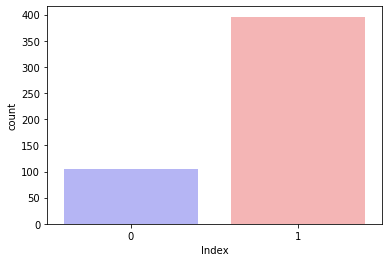

In [34]:
sns.countplot(x="Index", data=dataset, palette="bwr")
plt.show()

In [99]:
normal = len(dataset[dataset.Index == 0])
obesitas = len(dataset[dataset.Index == 1])
print("Persentase orang yang tidak obesitas : {:.2f}%".format((belumkenapenyakit / (len(dataset.Index))*100)))
print("Persentase orang yang obesitas : {:.2f}%".format((kenapenyakit / (len(dataset.Index))*100)))

Persentase orang yang tidak obesitas : 20.80%
Persentase orang yang obesitas : 79.20%


- terlihat jumlah data survey dimana 20.80 % pasien dinyatakan belum obesitas dan 79.20 % data dinyatakan positif terkena obesitas.
- Sedangkan pada grafik bar dibawah juga terlihat jumlah data bersdasarkan jenis kelammin,dimana pada dataset ini data jenis kelamin laki-laki lebih sedikit ketimbang data jenis kelamin perempuan)

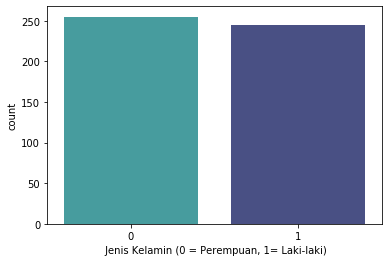

In [100]:
sns.countplot(x='Gender', data=dataset, palette="mako_r")
plt.xlabel(" Jenis Kelamin (0 = Perempuan, 1= Laki-laki)")
plt.show()

In [102]:
Perempuan = len(dataset[dataset.Gender == 0])
Laki_Laki = len(dataset[dataset.Gender == 1])
print("Persentase jumlah Perempuan : {:.2f}%".format((Perempuan / (len(dataset.Gender))*100)))
print("Persentase jumlah Laki-laki : {:.2f}%".format((Laki_Laki / (len(dataset.Gender))*100)))

Persentase jumlah Perempuan : 51.00%
Persentase jumlah Laki-laki : 49.00%


- Jika berdasarkan jenis kelamin, jumlah Perempuan (51.00%) lebih banyak ketimbang jumlah Laki-laki (49.00%)
- Jika berdasarkan berekat maka jumlah orang yang positif terkena obesitas biasanya memiliki berat badan lebih dari -100cm tinggi badannya

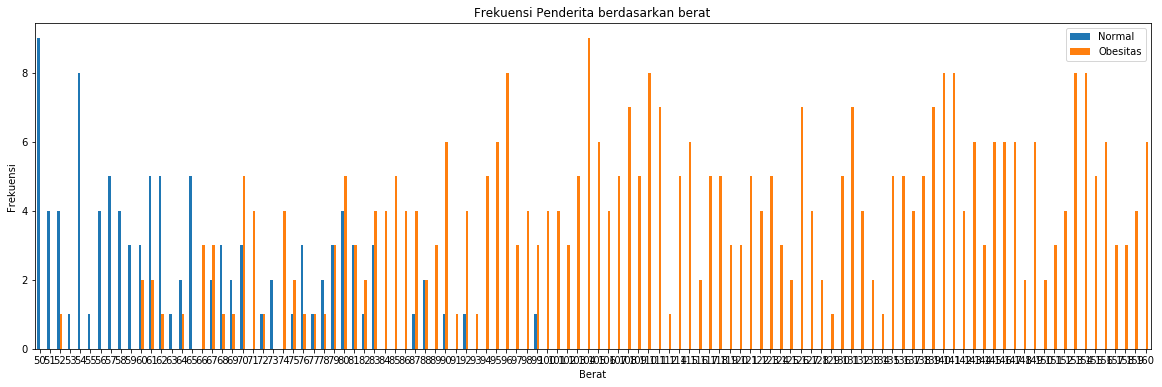

In [108]:
pd.crosstab(dataset.Weight,dataset.Index).plot(kind="bar",figsize=(20,6))
plt.title('Frekuensi Penderita berdasarkan berat')
plt.xlabel('Berat')
plt.xticks(rotation=0)
plt.legend(["Normal", "Obesitas"])
plt.ylabel('Frekuensi')
plt.savefig('show and age.png')
plt.show()

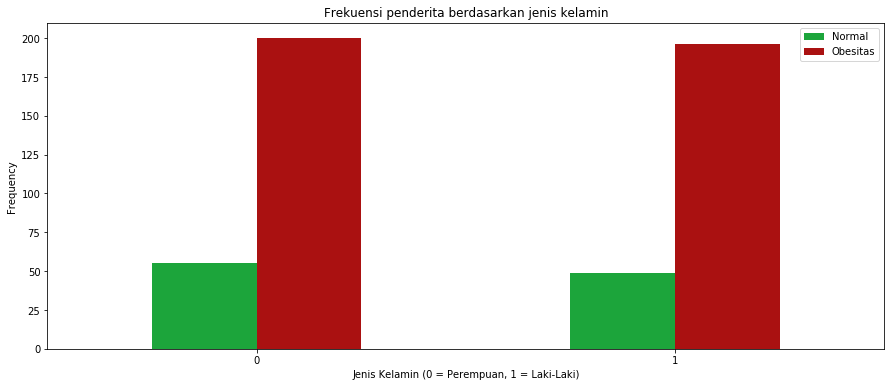

In [109]:
pd.crosstab(dataset.Gender,dataset.Index).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Frekuensi penderita berdasarkan jenis kelamin')
plt.xlabel('Jenis Kelamin (0 = Perempuan, 1 = Laki-Laki)')
plt.xticks(rotation=0)
plt.legend(["Normal", "Obesitas"])
plt.ylabel('Frequency')
plt.show()

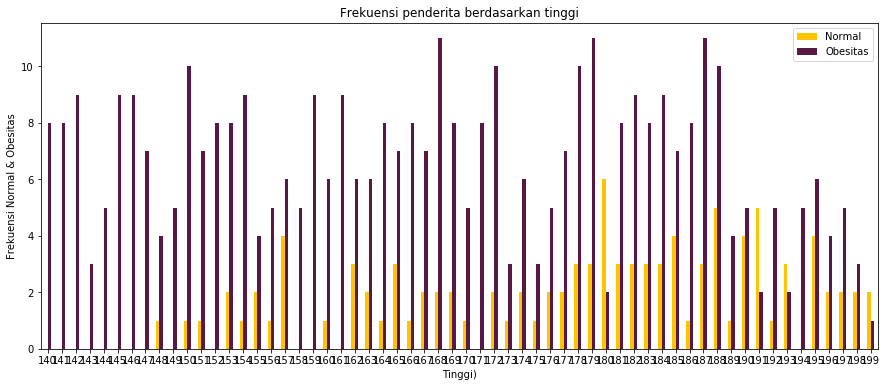

In [110]:
pd.crosstab(dataset.Height,dataset.Index).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Frekuensi penderita berdasarkan tinggi')
plt.xlabel('Tinggi)')
plt.xticks(rotation = 0)
plt.legend(["Normal", "Obesitas"])
plt.ylabel('Frekuensi Normal & Obesitas')
plt.show()

# 5. Menentukan Features dan Labels
features dimulai dari kolom 1-3 sedangkan untuk Lables sendiri kita ambil pada kolom terakhir yakni kolom 4

In [37]:
features = dataset.iloc[:, 0:3].values
labels = dataset.iloc[:, 3].values

# 6. Normalisasi
pada tahap ini kita menggunakan metode Normalisasi yaitu MinMaxScaler


In [38]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# 7. Splitting dan Modelling 
Pada tahap ini kita membuat file test berukuran 20 % dari jumlah keseluruhan data yang tersedia. Setelah itu kita membuat model NN dengan 50 hiden layer pertama dan 50 hiden layer kedua.selain itu kita membuat output layer 1 (iya atau tidak) 

In [39]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

In [73]:
model = Sequential()
model.add(Dense(units= 50, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

In [74]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=50, epochs=200)
acc_testing  = model.evaluate(testing_data, testing_label) 

Train on 400 samples, validate on 100 samples
Epoch 1/200
400/400 [==============================] - 1s 2ms/step - loss: 0.6831 - acc: 0.6275 - val_loss: 0.6487 - val_acc: 0.7900
Epoch 2/200
400/400 [==============================] - 0s 117us/step - loss: 0.6222 - acc: 0.7975 - val_loss: 0.5937 - val_acc: 0.7900
Epoch 3/200
400/400 [==============================] - 0s 117us/step - loss: 0.5720 - acc: 0.7950 - val_loss: 0.5464 - val_acc: 0.7900
Epoch 4/200
400/400 [==============================] - 0s 156us/step - loss: 0.5284 - acc: 0.7925 - val_loss: 0.5076 - val_acc: 0.7900
Epoch 5/200
400/400 [==============================] - 0s 117us/step - loss: 0.4908 - acc: 0.7925 - val_loss: 0.4752 - val_acc: 0.7900
Epoch 6/200
400/400 [==============================] - 0s 117us/step - loss: 0.4639 - acc: 0.7925 - val_loss: 0.4479 - val_acc: 0.7900
Epoch 7/200
400/400 [==============================] - 0s 117us/step - loss: 0.4367 - acc: 0.7925 - val_loss: 0.4230 - val_acc: 0.7900
Epoch 8/200

In [75]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.98


In [76]:
acc_training.history

{'val_loss': [0.6486839354038239,
  0.5937211811542511,
  0.5463795363903046,
  0.5076008141040802,
  0.47524483501911163,
  0.4478956609964371,
  0.4229891896247864,
  0.39712995290756226,
  0.3704722076654434,
  0.34467220306396484,
  0.3199182599782944,
  0.29645836353302,
  0.27560877054929733,
  0.256841316819191,
  0.24070216715335846,
  0.22694510221481323,
  0.21229273825883865,
  0.2012476995587349,
  0.18974272161722183,
  0.18181893229484558,
  0.17512719333171844,
  0.16697517037391663,
  0.16395701467990875,
  0.15534386783838272,
  0.15102170780301094,
  0.14538976922631264,
  0.14285430312156677,
  0.13638777658343315,
  0.13507230952382088,
  0.13119897991418839,
  0.12979105859994888,
  0.12823763862252235,
  0.12228941544890404,
  0.12151221185922623,
  0.1233941949903965,
  0.11772716417908669,
  0.11429988220334053,
  0.11379734054207802,
  0.11466044560074806,
  0.11419719457626343,
  0.1082797572016716,
  0.10499893873929977,
  0.11467951163649559,
  0.11318100243

# 8. Plotting Model Akurasi dan Loss Akurasi

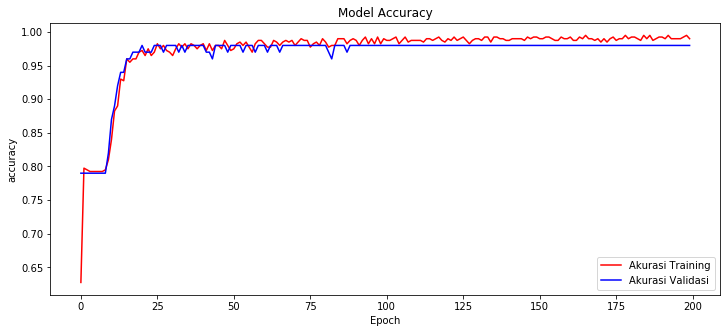

In [77]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['acc'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_acc'], 'blue', label='Akurasi Validasi')
ax0.plot(label='accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

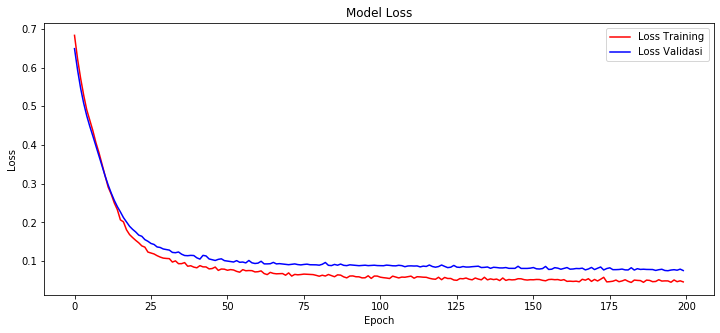

In [78]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

In [79]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [80]:
training_predicted.round()

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],

# 9. Matriks Confusion
Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining. Rumus ini melakukan perhitungan dengan 4 keluaran, yaitu: recall, precision, acuraccy dan error rate.

Confusion Matriks memiliki 4 instilah yaitu

    -True Positif
    -False Positif
    -False Negative
    -True Negativ
    
    
1. True Positives (TP): True positif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi juga 1 (Benar)

2. Negatif Benar (TN): True Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan prediksi juga 0 (Salah

3. Salah Positif (FP): False positif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan yang diprediksi adalah 1 (Benar).

4. Negatif Palsu (FN): False Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi adalah 0 (Salah).

In [81]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())

In [82]:
training_cm

array([[ 80,   3],
       [  0, 317]], dtype=int64)

In [83]:
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9925
Specificity training 1.0
Sensitivity training 0.963855421686747
Precision training 1.0
F1 Score training 0.9815950920245399


In [84]:
testing_cm

array([[19,  2],
       [ 0, 79]], dtype=int64)

In [85]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.98
Specificity testing 1.0
Sensitivity testing 0.9047619047619048
Precision testing 1.0
F1 Score testing 0.9500000000000001
